In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Proportion of dead and survivors

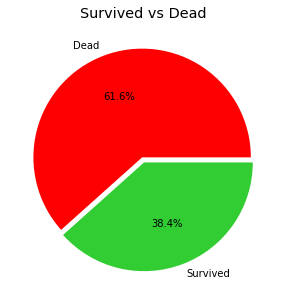

In [4]:
sizes = train_df['Survived'].value_counts()
fig ,ax = plt.subplots(figsize=(5,5))
ax.pie(sizes, autopct='%1.1f%%',labels = ["Dead","Survived"], explode=[0.025,0.025], colors = ["r","limegreen"])
ax.set_title('Survived vs Dead')
plt.show()  

### Distribution of dead and survivors by gender

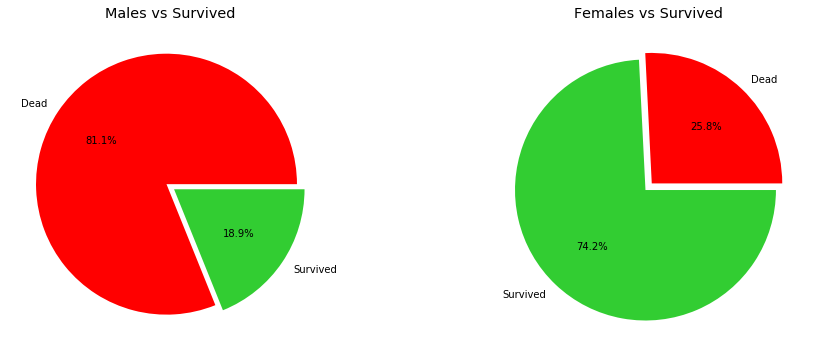

In [5]:
size_male  = train_df[train_df['Sex']== 'male']['Survived'].value_counts()
size_female = train_df[train_df['Sex']== 'female']['Survived'].value_counts()[::-1]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax[0].pie(size_male, labels = ["Dead","Survived"], autopct='%1.1f%%',explode=[0.035,0.035], colors = ["r","limegreen"])
ax[1].pie(size_female, labels = ["Dead","Survived"], autopct='%1.1f%%',explode=[0.035,0.035], colors = ["r","limegreen"])
ax[0].set_title('Males vs Survived')
ax[1].set_title('Females vs Survived')
plt.show()

### Visualize the count of survivors for other columns


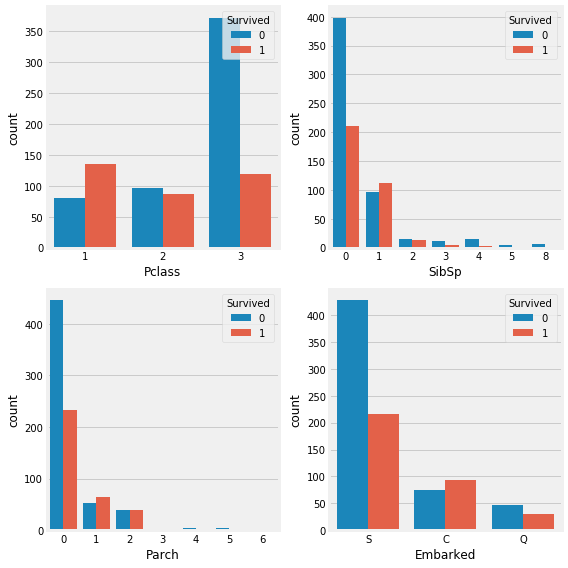

In [6]:
cols = ['Pclass', 'SibSp', 'Parch', 'Embarked']
n_rows = 2
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(8,8))

for row in range(0,n_rows):
    for col in range(0,n_cols):  
        
        i = row* n_cols + col      
        ax = axs[row][col]
        sns.countplot(train_df[cols[i]], hue=train_df["Survived"], ax=ax)
        ax.legend(title="Survived", loc='upper right')
        
plt.tight_layout()

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Handling Missing Values in Sets

train_df["Embarked"] = train_df["Embarked"].fillna(train_df['Embarked'].value_counts().index[0])
train_df["Age"] = train_df["Age"].fillna(int(train_df["Age"].median()))

test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median())

In [9]:
#Change genders end embarked columns to 0, 1 and 2

train_df["Embarked"] = train_df["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
train_df["Sex"] = train_df["Sex"].map({"male":0, "female":1}).astype(int)

test_df["Embarked"] = test_df["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
test_df["Sex"] = test_df["Sex"].map({"male":0, "female":1}).astype(int)

In [10]:
#Drop unnecessary columns

train_df.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis = 1, inplace = True)
id_df = test_df["PassengerId"]
test_df.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis = 1, inplace = True)

train_df = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived' ]]


In [11]:
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,0


In [12]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [13]:
# Selecting train columns

train_x = train_df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [14]:
# Selecting the target variable

train_y = train_df[["Survived"]]
train_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [15]:
# Validation Set

x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.30, random_state=1)

In [16]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
114,3,1,17.0,0,0,14.4583,1
874,2,1,28.0,1,0,24.0000,1
76,3,0,28.0,0,0,7.8958,0
876,3,0,20.0,0,0,9.8458,0
674,2,0,28.0,0,0,0.0000,0


In [17]:
y_train.head()

,Survived
114,0
874,1
76,0
876,0
674,0


### Logistic Regression

In [18]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print(confusion_matrix(lr_pred, y_test))
print(classification_report(lr_pred, y_test))
Accuracy_LogisticRegression = lr.score(x_test, y_test)
print("Accuracy = {}%".format(Accuracy_LogisticRegression * 100))

[[129  37]
 [ 24  78]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       166
           1       0.68      0.76      0.72       102

    accuracy                           0.77       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.77      0.77       268

Accuracy = 77.23880597014924%


### Cross Val Score

In [19]:
cross_val_score(lr, x_train, y_train, cv=3).mean()

0.80738263346959

### Grid Search

In [20]:
parameters = {"C": [0.001, 0.01, 0.1, 1.],"penalty": ["l1", "l2"]}
lrs = LogisticRegression(random_state = 1,class_weight="balanced",solver= "liblinear")
grid_Search = GridSearchCV(lrs, parameters, cv=3, scoring='accuracy')
grid_Search.fit(x_train, y_train)
grid_Search.best_score_

0.7913569924439491

In [21]:
grid_Search.fit(x_train, y_train)
pred = grid_Search.predict(test_df)

In [22]:
test_df['Survived'] = pred
test_df["PassengerId"] = id_df

In [23]:
final = test_df[["PassengerId", "Survived"]]
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [24]:
# Write to csv file
final.to_csv("prediction.csv", index = False)